In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import InMemorySaver

from IPython.display import Image, display

from dotenv import load_dotenv
_ = load_dotenv()



In [2]:
llm = init_chat_model("openai:gpt-4o-mini")

In [3]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [4]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}



# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [5]:
memory = InMemorySaver()
graph = graph_builder.compile(checkpointer=memory)

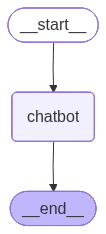

In [6]:

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
config = {"configurable": {"thread_id": "1"}}

def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", 
                                             "content": user_input}]},
                             config):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)



while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "Who are you?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  I want you to be my tutor


Assistant: Of course! I'd be happy to help you learn. What subject or topic would you like assistance with?


User:  can you teach me how to write effective CUDa kernel for ML applications


Assistant: Sure! Writing effective CUDA kernels for machine learning applications involves several considerations to maximize performance on NVIDIA GPUs. Here’s a guide to get you started:

### Basics of CUDA Programming

1. **Understanding CUDA Architecture**:
   - Familiarize yourself with the GPU architecture, including threads, blocks, and grids.
   - CUDA programs are structured into host (CPU) code and device (GPU) code.

2. **CUDA Kernels**:
   - A kernel is a function that runs on the GPU and is invoked from the CPU. You define a kernel with the `__global__` qualifier.

### Writing Efficient CUDA Kernels

1. **Memory Management**:
   - **Global Memory**: Access speed is slower; minimize accesses by coalescing memory operations.
   - **Shared Memory**: Fast access and shared among threads in the same block. Use it to store frequently accessed data.
   - **Registers**: Fastest memory; avoid excessive usage as it can limit the number of active threads.

2. **Thread Organization**:

User:  hmm how to use nvidia nsight, and waht is global memory why I shoudl minimize its access and how to expereiment with block size, what is memcpy assertion, also who is the best guy to refer to for doing this


Assistant: Let's break down your questions one by one to provide clarity on these concepts and tools related to CUDA programming.

### 1. Nvidia Nsight

**NVIDIA Nsight** is a powerful developer tool suite for debugging and profiling CUDA applications. Here’s how to get started with it:

- **Installation**: Install the appropriate version of Nsight that corresponds with your CUDA toolkit. This is often included in the NVIDIA CUDA Toolkit installation.
  
- **Profiling a CUDA Application**:
  1. Open your CUDA project in Visual Studio or your preferred IDE.
  2. Go to `NVIDIA Nsight` in the menu and select `Start Graphics Debugger` or `Start CUDA Debugger`.
  3. Choose the profiling option (including GPU utilization, memory bandwidth, etc.).
  4. Run your application and capture performance data.
  5. Analyze the captured data for bottlenecks such as memory access patterns, kernel launch latency, etc.

- **Key Features**:
  - Kernel profiling information.
  - Memory access patterns and 

User:  what does memcpy stands for


Assistant: `memcpy` stands for "memory copy." It is a standard library function in C and C++ that is used to copy a specified number of bytes from one memory location to another.

### Syntax
The typical syntax for `memcpy` is:

```c
void *memcpy(void *dest, const void *src, size_t n);
```

### Parameters:
- **`dest`**: A pointer to the destination memory location where bytes will be copied to.
- **`src`**: A pointer to the source memory location from which bytes will be copied.
- **`n`**: The number of bytes to copy.

### Return Value:
The function returns a pointer to the destination (`dest`).

### Example Usage:
Here's a simple example of how to use `memcpy`:

```c
#include <stdio.h>
#include <string.h>

int main() {
    char src[50] = "Hello, World!";
    char dest[50];

    // Copying the string from src to dest
    memcpy(dest, src, strlen(src) + 1);

    printf("Source: %s\n", src);
    printf("Destination: %s\n", dest);

    return 0;
}
```

### Important Notes:
- **Safety**: `m

User:  we are not copying anythign tho?


Assistant: When discussing `cudaMemcpy` in the context of CUDA programming, it's important to clarify that the purpose of this function is indeed to copy data between different memory spaces. This is crucial for GPU computation, where the CPU (host) and GPU (device) manage their own separate memory.

### Context of `cudaMemcpy`

In CUDA programming, you generally do the following:

1. **Allocate Memory on the Device**: You create memory on the GPU using functions like `cudaMalloc()`.
2. **Copy Data from Host to Device**: You typically need to copy data from the host (CPU memory) to the device (GPU memory) so that your CUDA kernels can operate on this data. This is where `cudaMemcpy` comes in.
3. **Launch CUDA Kernels**: Once the data is in device memory, you launch kernels that operate on this data.
4. **Copy Results Back**: After computation, you copy any results from device memory back to host memory using `cudaMemcpy`.

### Example of Data Transfer with `cudaMemcpy`

Here’s a more c

User:  i see, who is the CEO of OpenAI


Assistant: As of my last knowledge update in October 2023, the CEO of OpenAI is Sam Altman. He has held this position since March 2019. However, leadership positions can change, so I recommend checking the latest news or the official OpenAI website for the most current information.


User:  what about the director of shining


Assistant: "The Shining" is a classic horror film directed by Stanley Kubrick, released in 1980. The film is based on Stephen King's 1977 novel of the same name. Kubrick is known for his meticulous filmmaking and has directed numerous acclaimed films across various genres. If you have specific questions about the film or its director, feel free to ask!


User:  is messi the goat or Ronaldo


Assistant: The debate over whether Lionel Messi or Cristiano Ronaldo is the "GOAT" (Greatest of All Time) in football (soccer) is one of the most passionate and enduring discussions among fans of the sport. Both players have had extraordinary careers, and each has a strong case for being considered the GOAT. Here are some arguments in favor of each:

### Lionel Messi

1. **Natural Talent**: Many fans appreciate Messi's extraordinary dribbling skills, vision, and playmaking abilities. His low center of gravity allows him to maneuver through defenders with ease.

2. **Club Success**: Messi spent the majority of his career at FC Barcelona, where he won numerous titles, including multiple UEFA Champions League titles and La Liga championships. He holds the record for the most goals in a calendar year and the most goals in La Liga history.

3. **Individual Awards**: Messi has won multiple Ballon d'Or awards, which are given annually to the best player in the world.

4. **Consistency**: He h